<a href="https://colab.research.google.com/github/ANANTHA-KRISHNA-J/Forest-Fire-Project/blob/main/ForestFire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split as tts
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/forestfires.csv')
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
df.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [ ]:
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7),inplace=True)

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
month_dumies = pd.get_dummies(df.month,drop_first=True,dtype=int)

In [ ]:
df = pd.concat([df,month_dumies],axis=1)

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,7,5,mar,5,86.2,26.2,94.3,5.1,8.2,51,...,0,0,0,0,0,1,0,0,0,0
1,7,4,oct,2,90.6,35.4,669.1,6.7,18.0,33,...,0,0,0,0,0,0,0,0,1,0
2,7,4,oct,6,90.6,43.7,686.9,6.7,14.6,33,...,0,0,0,0,0,0,0,0,1,0
3,8,6,mar,5,91.7,33.3,77.5,9.0,8.3,97,...,0,0,0,0,0,1,0,0,0,0
4,8,6,mar,7,89.3,51.3,102.2,9.6,11.4,99,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df = df.drop('month',axis=1)
df.head()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,7,5,5,86.2,26.2,94.3,5.1,8.2,51,6.7,...,0,0,0,0,0,1,0,0,0,0
1,7,4,2,90.6,35.4,669.1,6.7,18.0,33,0.9,...,0,0,0,0,0,0,0,0,1,0
2,7,4,6,90.6,43.7,686.9,6.7,14.6,33,1.3,...,0,0,0,0,0,0,0,0,1,0
3,8,6,5,91.7,33.3,77.5,9.0,8.3,97,4.0,...,0,0,0,0,0,1,0,0,0,0
4,8,6,7,89.3,51.3,102.2,9.6,11.4,99,1.8,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.columns

Index(['X', 'Y', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'output', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [ ]:
df.iloc[-1:].T

,516
X,6.0
Y,3.0
day,2.0
FFMC,79.5
DMC,3.0
DC,106.7
ISI,1.1
temp,11.8
RH,31.0
wind,4.5


from matplotlib import pyplot as plt
_df_16[516].plot(kind='hist', bins=20, title=516)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17[516].plot(kind='line', figsize=(8, 4), title=516)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df = df.rename(columns={'area':'output'})

In [ ]:
df['output'].values[df['output'].values > 0] = 1

In [ ]:
df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
512    0
513    0
514    0
515    0
516    0
Name: sep, Length: 517, dtype: int64

In [ ]:
X = df.drop('output',axis=1)
X.head()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,7,5,5,86.2,26.2,94.3,5.1,8.2,51,6.7,...,0,0,0,0,0,1,0,0,0,0
1,7,4,2,90.6,35.4,669.1,6.7,18.0,33,0.9,...,0,0,0,0,0,0,0,0,1,0
2,7,4,6,90.6,43.7,686.9,6.7,14.6,33,1.3,...,0,0,0,0,0,0,0,0,1,0
3,8,6,5,91.7,33.3,77.5,9.0,8.3,97,4.0,...,0,0,0,0,0,1,0,0,0,0
4,8,6,7,89.3,51.3,102.2,9.6,11.4,99,1.8,...,0,0,0,0,0,1,0,0,0,0


from matplotlib import pyplot as plt
_df_0['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['day'].plot(kind='hist', bins=20, title='day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['FFMC'].plot(kind='hist', bins=20, title='FFMC')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Y', y='day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='day', y='FFMC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='FFMC', y='DMC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['X']
  ys = series['Y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('X', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('X')
_ = plt.ylabel('Y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['X']
  ys = series['day']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('X', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('X')
_ = plt.ylabel('day')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['X']
  ys = series['FFMC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('X', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('X')
_ = plt.ylabel('FFMC')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['X']
  ys = series['DMC']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('X', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('X')
_ = plt.ylabel('DMC')

from matplotlib import pyplot as plt
_df_12['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['day'].plot(kind='line', figsize=(8, 4), title='day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['FFMC'].plot(kind='line', figsize=(8, 4), title='FFMC')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
y = df['output']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: output, dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.0,7.0,9.0
Y,517.0,4.299807,1.229900,2.0,4.0,4.0,5.0,9.0
day,517.0,4.259188,2.072929,1.0,2.0,5.0,6.0,7.0
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.6,92.9,96.2
DMC,517.0,110.872340,64.046482,1.1,68.6,108.3,142.4,291.3
DC,517.0,547.940039,248.066192,7.9,437.7,664.2,713.9,860.6
ISI,517.0,9.021663,4.559477,0.0,6.5,8.4,10.8,56.1
temp,517.0,18.889168,5.806625,2.2,15.5,19.3,22.8,33.3
RH,517.0,44.288201,16.317469,15.0,33.0,42.0,53.0,100.0
wind,517.0,4.017602,1.791653,0.4,2.7,4.0,4.9,9.4


In [ ]:
df.corr()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
X,1.000000,0.539548,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,...,-0.006547,0.041721,-0.045002,0.061062,0.129616,0.007827,0.008917,0.025344,0.089545,-0.087216
Y,0.539548,1.000000,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,...,0.075850,0.016358,0.010153,0.061449,0.078594,0.050495,-0.015206,-0.046570,0.004717,-0.105465
day,-0.024922,-0.005453,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,...,-0.095214,0.028170,0.067430,-0.005016,0.013585,-0.036634,0.037338,-0.048025,-0.032764,-0.022955
FFMC,-0.021039,-0.046308,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,-0.048384,0.007782,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,-0.085916,-0.101178,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.006210,-0.024488,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,-0.051258,-0.024103,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,0.085223,0.062221,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,0.018798,-0.020341,0.032478,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476


In [ ]:
df.corr()['output'].sort_values()

mar      -0.116497
oct      -0.065375
jan      -0.065155
nov      -0.046027
day      -0.042970
RH       -0.035587
jun      -0.019068
feb      -0.008933
may      -0.002775
jul       0.020701
aug       0.023512
rain      0.025550
ISI       0.035663
wind      0.055702
Y         0.056892
sep       0.058959
X         0.062491
DMC       0.062672
FFMC      0.073823
temp      0.076047
DC        0.096724
dec       0.127308
output    1.000000
Name: output, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
scaler = ss()
scaler.fit(X)
scaled_features = scaler.transform(X)

In [ ]:
df_features = pd.DataFrame(scaled_features,columns=X.columns)
df_features.head()

,X,Y,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.008313,0.569860,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,1.008313,-0.244001,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,1.008313,-0.244001,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,1.440925,1.383722,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,1.440925,1.383722,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081


LOGISTIC **REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=200)

In [ ]:
y_train

500    0.0
311    1.0
69     0.0
392    1.0
477    1.0
      ... 
139    1.0
185    1.0
219    1.0
345    1.0
79     0.0
Name: output, Length: 361, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
model = lr()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5192307692307693

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Precision : ', metrics.precision_score(y_test,y_pred))
print('Recall :', metrics.recall_score(y_test,y_pred))
print('Accuracy :', metrics.accuracy_score(y_test,y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_test,y_pred))
print('Classification report :', metrics.classification_report(y_test,y_pred))


Precision :  0.5094339622641509
Recall : 0.7012987012987013
Accuracy : 0.5192307692307693
Confusion matrix : [[27 52]
 [23 54]]
Classification report :               precision    recall  f1-score   support

         0.0       0.54      0.34      0.42        79
         1.0       0.51      0.70      0.59        77

    accuracy                           0.52       156
   macro avg       0.52      0.52      0.50       156
weighted avg       0.52      0.52      0.50       156



In [ ]:
class_label = {1:'FUCK THEREs FIRE',0:'DONT WORRY YOUR FOREST IS SAFE'}
x = [[6.0, 3.0, 2.0, 79.5, 3.0, 106.7, 1.1, 11.8, 31.0, 4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

y_predict = model.predict(x)
print(class_label[y_predict[0]])

FUCK THEREs FIRE


**SVM**

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
#model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('Precision : ', metrics.precision_score(y_test,y_pred))
print('Recall :', metrics.recall_score(y_test,y_pred))
print('Accuracy :', metrics.accuracy_score(y_test,y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_test,y_pred))
print('Classification report :', metrics.classification_report(y_test,y_pred))
class_label = {1:'THEREs FIRE ESCAPE SOON',0:'DONT WORRY YOU ARE SAFE'}
x = [[6.0, 3.0, 2.0, 79.5, 3.0, 106.7, 1.1, 11.8, 31.0, 4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

y_predict = model.predict(x)
print(class_label[y_predict[0]])

Precision :  0.5343511450381679
Recall : 0.9090909090909091
Accuracy : 0.5641025641025641
Confusion matrix : [[18 61]
 [ 7 70]]
Classification report :               precision    recall  f1-score   support

         0.0       0.72      0.23      0.35        79
         1.0       0.53      0.91      0.67        77

    accuracy                           0.56       156
   macro avg       0.63      0.57      0.51       156
weighted avg       0.63      0.56      0.51       156

DONT WORRY YOUR FOREST IS SAFE


**TREES**

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC()
model.fit(X_train,y_train)
#model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('Precision : ', metrics.precision_score(y_test,y_pred))
print('Recall :', metrics.recall_score(y_test,y_pred))
print('Accuracy :', metrics.accuracy_score(y_test,y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_test,y_pred))
print('Classification report :', metrics.classification_report(y_test,y_pred))
class_label = {1:'THEREs FIRE ESCAPE SOON',0:'DONT WORRY YOU ARE SAFE'}
x = [[6.0, 3.0, 2.0, 79.5, 3.0, 106.7, 1.1, 11.8, 31.0, 4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

y_predict = model.predict(x)
print(class_label[y_predict[0]])

Precision :  0.5869565217391305
Recall : 0.7012987012987013
Accuracy : 0.6089743589743589
Confusion matrix : [[41 38]
 [23 54]]
Classification report :               precision    recall  f1-score   support

         0.0       0.64      0.52      0.57        79
         1.0       0.59      0.70      0.64        77

    accuracy                           0.61       156
   macro avg       0.61      0.61      0.61       156
weighted avg       0.61      0.61      0.61       156

DONT WORRY YOUR FOREST IS SAFE


**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
#model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('Precision : ', metrics.precision_score(y_test,y_pred))
print('Recall :', metrics.recall_score(y_test,y_pred))
print('Accuracy :', metrics.accuracy_score(y_test,y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_test,y_pred))
print('Classification report :', metrics.classification_report(y_test,y_pred))
class_label = {1:' THEREs FIRE ESCAPE SOON',0:'DONT WORRY YOU ARE SAFE'}
x = [[6.0, 3.0, 2.0, 79.5, 3.0, 106.7, 1.1, 11.8, 31.0, 4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

y_predict = model.predict(x)
print(class_label[y_predict[0]])

Precision :  0.5114503816793893
Recall : 0.8701298701298701
Accuracy : 0.5256410256410257
Confusion matrix : [[15 64]
 [10 67]]
Classification report :               precision    recall  f1-score   support

         0.0       0.60      0.19      0.29        79
         1.0       0.51      0.87      0.64        77

    accuracy                           0.53       156
   macro avg       0.56      0.53      0.47       156
weighted avg       0.56      0.53      0.46       156

DONT WORRY YOUR FOREST IS SAFE


**ENSEMBLE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
model = RFC()
model.fit(X_train,y_train)
#model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('Precision : ', metrics.precision_score(y_test,y_pred))
print('Recall :', metrics.recall_score(y_test,y_pred))
print('Accuracy :', metrics.accuracy_score(y_test,y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_test,y_pred))
print('Classification report :', metrics.classification_report(y_test,y_pred))
class_label = {1:'THEREs FIRE ESCAPE SOON',0:'DONT WORRY YOU ARE SAFE'}
x = [[6.0, 3.0, 2.0, 79.5, 3.0, 106.7, 1.1, 11.8, 31.0, 4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

y_predict = model.predict(x)
print(class_label[y_predict[0]])

Precision :  0.5306122448979592
Recall : 0.6753246753246753
Accuracy : 0.5448717948717948
Confusion matrix : [[33 46]
 [25 52]]
Classification report :               precision    recall  f1-score   support

         0.0       0.57      0.42      0.48        79
         1.0       0.53      0.68      0.59        77

    accuracy                           0.54       156
   macro avg       0.55      0.55      0.54       156
weighted avg       0.55      0.54      0.54       156

DONT WORRY YOUR FOREST IS SAFE


***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC
model = KNC(n_neighbors=6)
model.fit(X_train,y_train)
#model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('Precision : ', metrics.precision_score(y_test,y_pred))
print('Recall :', metrics.recall_score(y_test,y_pred))
print('Accuracy :', metrics.accuracy_score(y_test,y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_test,y_pred))
print('Classification report :', metrics.classification_report(y_test,y_pred))
class_label = {1:'THEREs FIRE ESCAPE SOON',0:'DONT WORRY YOU ARE SAFE'}
x = [[6.0, 3.0, 2.0, 79.5, 3.0, 106.7, 1.1, 11.8, 31.0, 4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

y_predict = model.predict(x)
print(class_label[y_predict[0]])

Precision :  0.5384615384615384
Recall : 0.5454545454545454
Accuracy : 0.5448717948717948
Confusion matrix : [[43 36]
 [35 42]]
Classification report :               precision    recall  f1-score   support

         0.0       0.55      0.54      0.55        79
         1.0       0.54      0.55      0.54        77

    accuracy                           0.54       156
   macro avg       0.54      0.54      0.54       156
weighted avg       0.54      0.54      0.54       156

DONT WORRY YOUR FOREST IS SAFE


In [ ]:
### K VALUE SELECTION
error_rate = []

for i in range(2 , 40):
    knn = KNC(n_neighbors = i)
    knn.fit(X_train , y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

print(error_rate)


[0.47435897435897434, 0.4423076923076923, 0.47435897435897434, 0.5, 0.4551282051282051, 0.46794871794871795, 0.44871794871794873, 0.4807692307692308, 0.46153846153846156, 0.46794871794871795, 0.48717948717948717, 0.4807692307692308, 0.4807692307692308, 0.48717948717948717, 0.4807692307692308, 0.5, 0.4935897435897436, 0.4935897435897436, 0.5, 0.47435897435897434, 0.4935897435897436, 0.47435897435897434, 0.48717948717948717, 0.46153846153846156, 0.4551282051282051, 0.46153846153846156, 0.42948717948717946, 0.4358974358974359, 0.4230769230769231, 0.4166666666666667, 0.42948717948717946, 0.41025641025641024, 0.41025641025641024, 0.42948717948717946, 0.4230769230769231, 0.42948717948717946, 0.4358974358974359, 0.4166666666666667]


Text(0, 0.5, 'Error Rate')

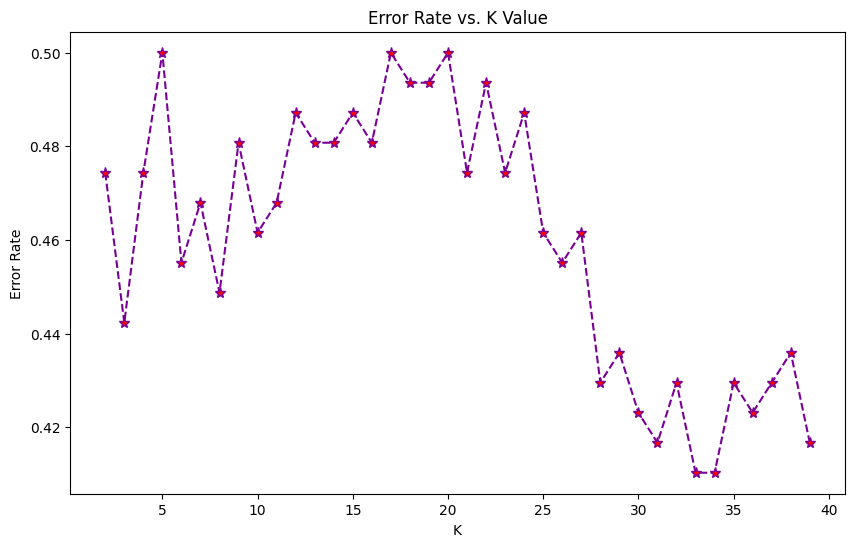

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(2,40),error_rate, color = '#780096' , marker = '*' , markersize=8, markerfacecolor='red' ,  linestyle='dashed',)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC
model = KNC(n_neighbors=7)
model.fit(X_train,y_train)
#model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('Precision : ', metrics.precision_score(y_test,y_pred))
print('Recall :', metrics.recall_score(y_test,y_pred))
print('Accuracy :', metrics.accuracy_score(y_test,y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_test,y_pred))
print('Classification report :', metrics.classification_report(y_test,y_pred))
class_label = {1:'THEREs FIRE ESCAPE SOON',0:'DONT WORRY YOU ARE SAFE'}
x = [[6.0, 3.0, 2.0, 79.5, 3.0, 106.7, 1.1, 11.8, 31.0, 4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

y_predict = model.predict(x)
print(class_label[y_predict[0]])

Precision :  0.5212765957446809
Recall : 0.6363636363636364
Accuracy : 0.532051282051282
Confusion matrix : [[34 45]
 [28 49]]
Classification report :               precision    recall  f1-score   support

         0.0       0.55      0.43      0.48        79
         1.0       0.52      0.64      0.57        77

    accuracy                           0.53       156
   macro avg       0.53      0.53      0.53       156
weighted avg       0.54      0.53      0.53       156

DONT WORRY YOUR FOREST IS SAFE


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNC
model = KNC(n_neighbors=17)
model.fit(X_train,y_train)
#model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('Precision : ', metrics.precision_score(y_test,y_pred))
print('Recall :', metrics.recall_score(y_test,y_pred))
print('Accuracy :', metrics.accuracy_score(y_test,y_pred))
print('Confusion matrix :', metrics.confusion_matrix(y_test,y_pred))
print('Classification report :', metrics.classification_report(y_test,y_pred))
class_label = {1:'THEREs FIRE ESCAPE SOON',0:'DONT WORRY YOU ARE SAFE'}
x = [[6.0, 3.0, 2.0, 79.5, 3.0, 106.7, 1.1, 11.8, 31.0, 4.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

y_predict = model.predict(x)
print(class_label[y_predict[0]])

Precision :  0.4954128440366973
Recall : 0.7012987012987013
Accuracy : 0.5
Confusion matrix : [[24 55]
 [23 54]]
Classification report :               precision    recall  f1-score   support

         0.0       0.51      0.30      0.38        79
         1.0       0.50      0.70      0.58        77

    accuracy                           0.50       156
   macro avg       0.50      0.50      0.48       156
weighted avg       0.50      0.50      0.48       156

DONT WORRY YOUR FOREST IS SAFE
